# Лабораторная работа по теме: "Анализ данных с помощью возможностей языка Python"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


### Задание №1

Для заданий этого занятия требуется загрузить датасет 'Customer-Churn-Records.csv' ([страница датасета на Kaggle](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)). Датасет можно загрузить из директории datasets. В датасете указаны данные о клиентах банка и времени их оттока. Загрузите этот датасет в виде датафрейма

In [ ]:
df_churns = pd.read_csv('/content/drive/MyDrive/Customer-Churn-Records.csv')
df_churns.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


### Задание №2

Приведите все названия столбцов к нижнему регистру и замените пробелы на знак '_'.


In [ ]:
df_churns.columns = [column.lower().replace(' ', '_') for column in df_churns.columns.values]
df_churns

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


### Задание №3

Выведите информацию по этому датафрейму

In [ ]:
df_churns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rownumber           10000 non-null  int64  
 1   customerid          10000 non-null  int64  
 2   surname             10000 non-null  object 
 3   creditscore         10000 non-null  int64  
 4   geography           10000 non-null  object 
 5   gender              10000 non-null  object 
 6   age                 10000 non-null  int64  
 7   tenure              10000 non-null  int64  
 8   balance             10000 non-null  float64
 9   numofproducts       10000 non-null  int64  
 10  hascrcard           10000 non-null  int64  
 11  isactivemember      10000 non-null  int64  
 12  estimatedsalary     10000 non-null  float64
 13  exited              10000 non-null  int64  
 14  complain            10000 non-null  int64  
 15  satisfaction_score  10000 non-null  int64  
 16  card_

### Задание №4

Отобразите в виде столбчатой диаграммы страны ('geography') по среднему балансу счетов клиентов банка ('balance').

<BarContainer object of 3 artists>

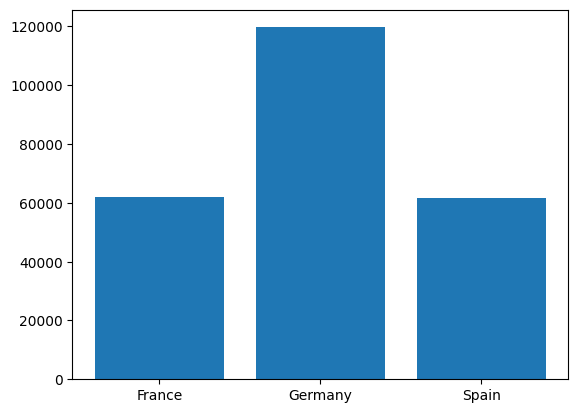

In [ ]:
avrg_country_balance = df_churns.groupby('geography')['balance'].mean()
plt.bar(avrg_country_balance.index, avrg_country_balance)

### Задание №5

Добавьте к существующему датафрейму столбец, содержащий средний баланс счета клиента по стране.

In [ ]:
df_churns.insert(len(df_churns.columns),
                 'balance_by_country',
                 avrg_country_balance[df_churns['geography']].to_list())
df_churns

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned,balance_by_country
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,62092.636516
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,61818.147763
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,62092.636516
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,62092.636516
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,61818.147763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,62092.636516
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,62092.636516
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,62092.636516
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,119730.116134


### Задание №6*

Постройте столбчатую диаграмму с накоплением для общего количества продуктов по различным странам и полу клиентов банка. Укажите легенду, чтобы было легче прочитать график.

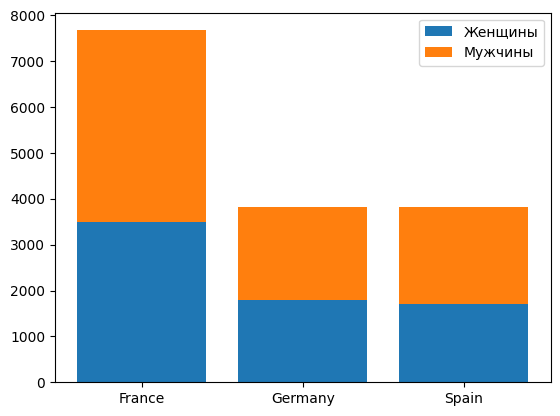

In [ ]:
product_counts = df_churns.groupby(['geography', 'gender'])['numofproducts'].sum().unstack()
plt.bar(product_counts.index, product_counts['Female'])
plt.bar(product_counts.index, product_counts['Male'], bottom=product_counts['Female'])
plt.legend(['Женщины', 'Мужчины'])